In [1]:
source("/secure/projects/HTAPP_MBC/src/init_phase2.R")

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3
Loading combined annotation: annot


In [2]:
sample_sheet[,channel_id:=paste0(sampleid,"_",condition,"_",replicate),]

In [3]:
raw_stats_files=list.files(path = statsDir,pattern="_annot_stats.tsv",full.names = TRUE)

In [4]:
all_stats=data.table()
for (raw_stats in raw_stats_files){
    f=fread(raw_stats)
    all_stats=rbindlist(list(all_stats,f))
}

In [5]:
all_stats_annot=merge(all_stats,sample_sheet[!duplicated(paste0(sampleid,condition,replicate))],by.x=c("name","condition","replicate"),by.y=c("sampleid","condition","replicate"))

In [6]:
head(all_stats_annot)

name,condition,replicate,cellid,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,RNA_snn_res.0.8,seurat_clusters,labels,labels_score,labels_unif,labels_cl,labels_cl_unif,ccpm,Quality,Order,run status,Note,date,run_pipeline,Channel Name,Lane,Index,cancer,site,reference,chemistry,flowcell,seq_dir,mode,min_umis,min_genes,percent_mito,expected_cells,total_droplets,z_dim,z_layers,channel_id,channel_id_match
<chr>,<chr>,<chr>,<chr>,<chr>,<int64>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
HTAPP-211-SMP-6751,TST,channel1,HTAPP-211-SMP-6751-TST-channel1_CAGGCCAAGTGGTTAA-1,HTAPP-211-SMP-6751-TST-channel1,26211,9130,9.507459,23,23,Epithelial cells,0.4647507,Epithelial,Epithelial cells,Epithelial,0300628_T1_TST,,47,done1,,2019_04_02,FALSE,0300628_T1_TST,1,SI-GA-A1,breast,liver,GRCh38_premrna_v3.0.0,SC3Pv3,HY3H7CCXY,/transfer/190330_SL-HXZ_0566_BFCHY3H7CCXY,V3,0,0,60,4000,30000,200,1000,HTAPP-211-SMP-6751_TST_channel1,HTAPP-211-SMP-6751-TST-channel1
HTAPP-211-SMP-6751,TST,channel1,HTAPP-211-SMP-6751-TST-channel1_TTGCTGCAGACTTCCA-1,HTAPP-211-SMP-6751-TST-channel1,24855,9180,2.687588,23,23,Epithelial cells,0.4394724,Epithelial,Epithelial cells,Epithelial,0300628_T1_TST,,47,done1,,2019_04_02,FALSE,0300628_T1_TST,1,SI-GA-A1,breast,liver,GRCh38_premrna_v3.0.0,SC3Pv3,HY3H7CCXY,/transfer/190330_SL-HXZ_0566_BFCHY3H7CCXY,V3,0,0,60,4000,30000,200,1000,HTAPP-211-SMP-6751_TST_channel1,HTAPP-211-SMP-6751-TST-channel1
HTAPP-211-SMP-6751,TST,channel1,HTAPP-211-SMP-6751-TST-channel1_CCCATTGTCTGTGCAA-1,HTAPP-211-SMP-6751-TST-channel1,24581,10099,4.239046,23,23,Hepatocytes,0.4999810,Hepatocytes,Epithelial cells,Epithelial,0300628_T1_TST,,47,done1,,2019_04_02,FALSE,0300628_T1_TST,1,SI-GA-A1,breast,liver,GRCh38_premrna_v3.0.0,SC3Pv3,HY3H7CCXY,/transfer/190330_SL-HXZ_0566_BFCHY3H7CCXY,V3,0,0,60,4000,30000,200,1000,HTAPP-211-SMP-6751_TST_channel1,HTAPP-211-SMP-6751-TST-channel1
HTAPP-211-SMP-6751,TST,channel1,HTAPP-211-SMP-6751-TST-channel1_GATCGTATCCCAGGAC-1,HTAPP-211-SMP-6751-TST-channel1,21205,8796,4.456496,23,23,Epithelial cells,0.4141249,Epithelial,Epithelial cells,Epithelial,0300628_T1_TST,,47,done1,,2019_04_02,FALSE,0300628_T1_TST,1,SI-GA-A1,breast,liver,GRCh38_premrna_v3.0.0,SC3Pv3,HY3H7CCXY,/transfer/190330_SL-HXZ_0566_BFCHY3H7CCXY,V3,0,0,60,4000,30000,200,1000,HTAPP-211-SMP-6751_TST_channel1,HTAPP-211-SMP-6751-TST-channel1
HTAPP-211-SMP-6751,TST,channel1,HTAPP-211-SMP-6751-TST-channel1_CCAATGACAGTTCACA-1,HTAPP-211-SMP-6751-TST-channel1,19870,7710,17.075994,23,23,Epithelial cells,0.4295492,Epithelial,Epithelial cells,Epithelial,0300628_T1_TST,,47,done1,,2019_04_02,FALSE,0300628_T1_TST,1,SI-GA-A1,breast,liver,GRCh38_premrna_v3.0.0,SC3Pv3,HY3H7CCXY,/transfer/190330_SL-HXZ_0566_BFCHY3H7CCXY,V3,0,0,60,4000,30000,200,1000,HTAPP-211-SMP-6751_TST_channel1,HTAPP-211-SMP-6751-TST-channel1
HTAPP-211-SMP-6751,TST,channel1,HTAPP-211-SMP-6751-TST-channel1_TGGTGATAGCCTCTCT-1,HTAPP-211-SMP-6751-TST-channel1,19782,8582,5.039935,23,23,Epithelial cells,0.4603706,Epithelial,Epithelial cells,Epithelial,0300628_T1_TST,,47,done1,,2019_04_02,FALSE,0300628_T1_TST,1,SI-GA-A1,breast,liver,GRCh38_premrna_v3.0.0,SC3Pv3,HY3H7CCXY,/transfer/190330_SL-HXZ_0566_BFCHY3H7CCXY,V3,0,0,60,4000,30000,200,1000,HTAPP-211-SMP-6751_TST_channel1,HTAPP-211-SMP-6751-TST-channel1


In [7]:
unif_sort=sort(table(all_stats$labels_unif),decreasing=TRUE)
unif_sort


          Epithelial          Hepatocytes           Macrophage 
              428967               104167                69491 
         Endothelial         CD8+ T-cells         CD4+ T-cells 
               53360                44189                34820 
         Chondrocyte      Mesangial cells                    B 
               33804                27623                25551 
       Smooth muscle              Neurons           Adipocytes 
               24852                24659                24145 
          Fibroblast         Erythrocytes          Melanocytes 
               21624                18026                15995 
            Monocyte                   NK        Keratinocytes 
               15159                13359                 9732 
                  DC                  HSC      Skeletal muscle 
                9217                 8999                 7243 
            Myocytes            Pericytes           Neutrophil 
                6060                 37

In [8]:
cl_unif_sort=sort(table(all_stats$labels_cl_unif),decreasing=TRUE)
cl_unif_sort


       Epithelial       Hepatocytes        Macrophage      CD8+ T-cells 
           534140            110341             86419             62617 
      Endothelial        Fibroblast      CD4+ T-cells     Smooth muscle 
            55109             40631             28373             21478 
                B       Chondrocyte           Neurons                DC 
            15822             13353             11737              8642 
               NK        Adipocytes          Monocyte         iPS_cells 
             7453              7088              7015              5537 
  Skeletal muscle  Pre-B_cell_CD34-   Mesangial cells      Erythrocytes 
             2724              2653              2632              2382 
       Neutrophil               HSC          Myocytes           T_cells 
             1590              1446              1308               854 
 Pro-B_cell_CD34+ Tissue_stem_cells     Pro-Myelocyte                BM 
              506               452               

In [9]:
all_stats_annot[,label_concordance:=c(labels_cl_unif==labels_unif),]
table(all_stats_annot$label_concordance)


 FALSE   TRUE 
302152 731546 

In [10]:
all_stats_annot[,labels_cl_unif_per_channel:=.N,by=c("labels_cl_unif","orig.ident")]

### stats per channel

In [11]:
all_stats_annot_red=all_stats_annot[,.(N_cells=.N,median_features=median(nFeature_RNA),median_umis=median(nCount_RNA),median_mito=median(percent.mito)),by=c("orig.ident","mode","name","condition","replicate")]

In [12]:
all_stats_annot_red

orig.ident,mode,name,condition,replicate,N_cells,median_features,median_umis,median_mito
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
HTAPP-211-SMP-6751-TST-channel1,V3,HTAPP-211-SMP-6751,TST,channel1,14182,719.0,779.0,0.6250000
HTAPP-211-SMP-6751-TST-channel2,V3,HTAPP-211-SMP-6751,TST,channel2,11530,1518.0,1833.0,1.0638298
HTAPP-213-SMP-6752-TST-channel1,V3,HTAPP-213-SMP-6752,TST,channel1,6722,1262.0,1660.5,1.5481635
HTAPP-213-SMP-6752-TST-channel2,V3,HTAPP-213-SMP-6752,TST,channel2,7336,1279.0,1636.5,1.3290942
HTAPP-214-SMP-6753-TST-channel1,V3,HTAPP-214-SMP-6753,TST,channel1,134,143.5,173.5,1.5836537
HTAPP-214-SMP-6753-TST-channel2,V3,HTAPP-214-SMP-6753,TST,channel2,503,96.0,174.0,7.2815534
HTAPP-223-SMP-6755-TST-channel1,V3,HTAPP-223-SMP-6755,TST,channel1,10309,1342.0,1922.0,0.0907441
HTAPP-223-SMP-6755-TST-channel2,V3,HTAPP-223-SMP-6755,TST,channel2,9995,1284.0,1545.0,0.7241814
HTAPP-223-SMP-7537-TST-channel1,V3,HTAPP-223-SMP-7537,TST,channel1,28746,129.0,1018.0,1.4598540


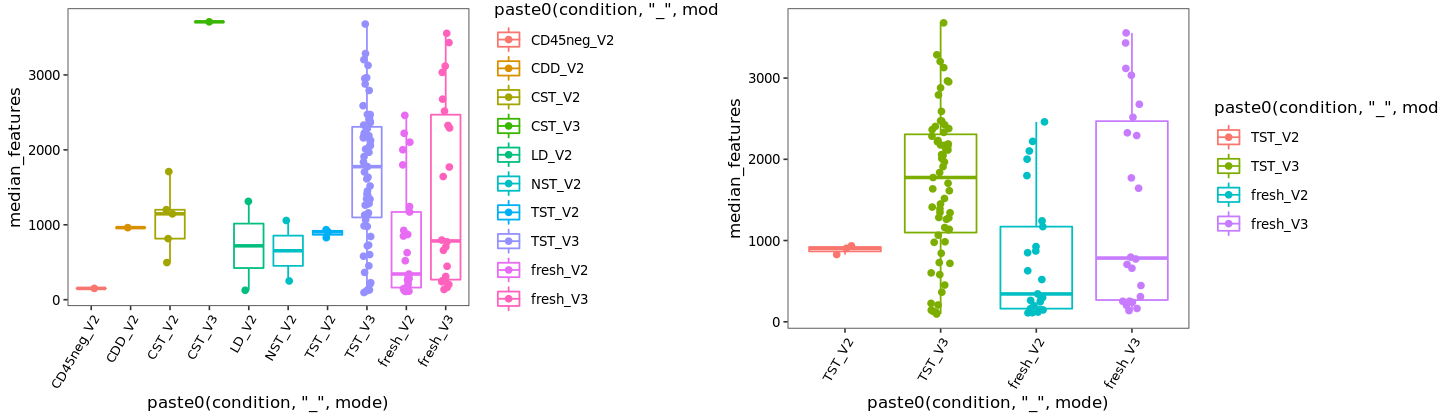

In [59]:
options(repr.plot.width = 12, repr.plot.height =3.5)
pl1=ggplot(all_stats_annot_red,aes(x=paste0(condition,"_",mode),y=median_features,color=paste0(condition,"_",mode)))+geom_boxplot()+geom_point(position=position_jitter(width=0.1))+rotate_labels()
pl2=ggplot(all_stats_annot_red[condition%in%c("TST","fresh")],aes(x=paste0(condition,"_",mode),y=median_features,color=paste0(condition,"_",mode)))+geom_boxplot()+geom_point(position=position_jitter(width=0.1))+rotate_labels()
cowplot::plot_grid(pl1,pl2)

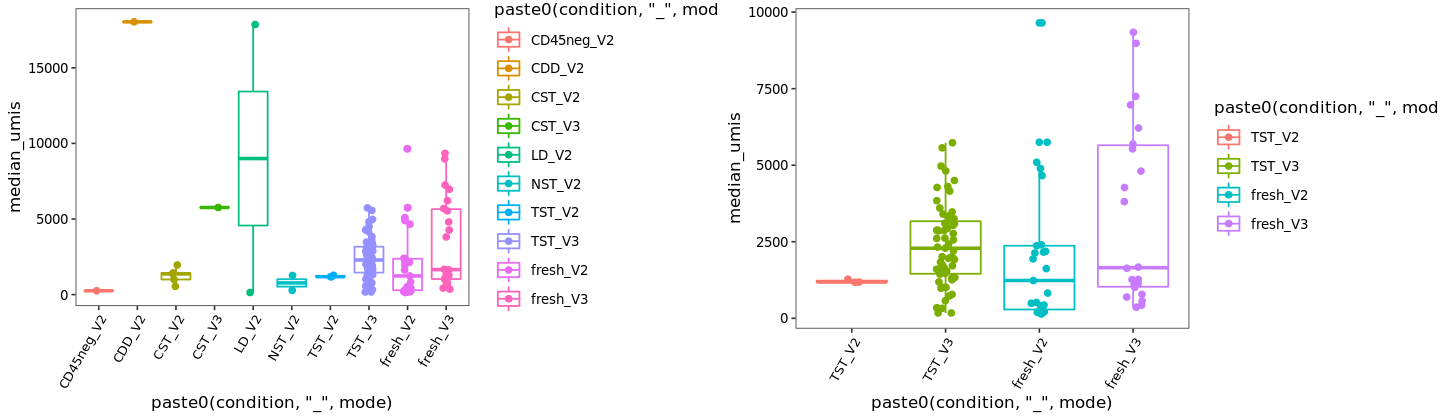

In [60]:
options(repr.plot.width = 12, repr.plot.height =3.5)
pl1=ggplot(all_stats_annot_red,aes(x=paste0(condition,"_",mode),y=median_umis,color=paste0(condition,"_",mode)))+geom_boxplot()+geom_point(position=position_jitter(width=0.1))+rotate_labels()
pl2=ggplot(all_stats_annot_red[condition%in%c("TST","fresh")],aes(x=paste0(condition,"_",mode),y=median_umis,color=paste0(condition,"_",mode)))+geom_boxplot()+geom_point(position=position_jitter(width=0.1))+rotate_labels()
cowplot::plot_grid(pl1,pl2)

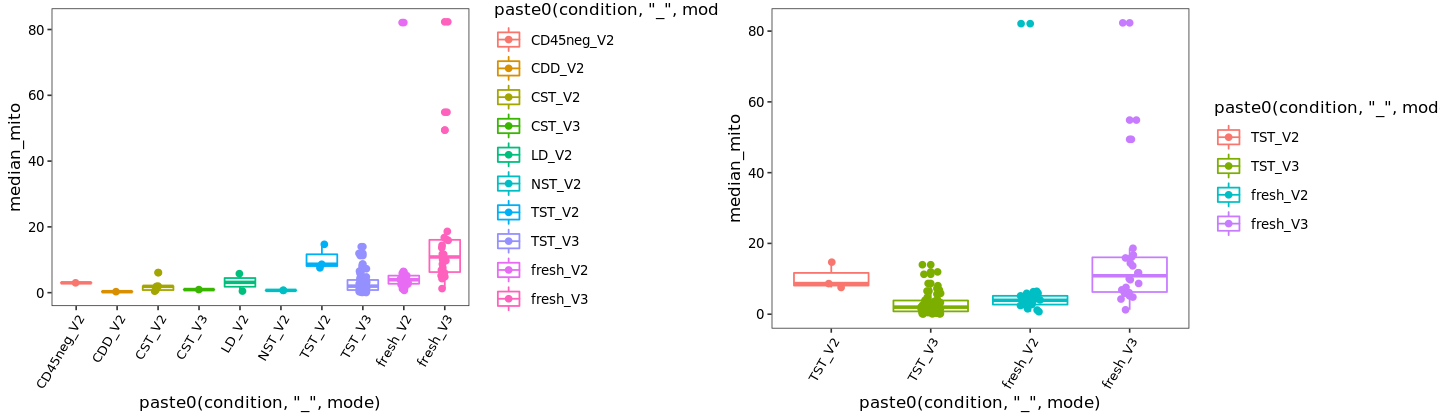

In [82]:
options(repr.plot.width = 12, repr.plot.height =3.5)
pl1=ggplot(all_stats_annot_red,aes(x=paste0(condition,"_",mode),y=median_mito,color=paste0(condition,"_",mode)))+geom_boxplot()+geom_point(position=position_jitter(width=0.1))+rotate_labels()
pl2=ggplot(all_stats_annot_red[condition%in%c("TST","fresh")],aes(x=paste0(condition,"_",mode),y=median_mito,color=paste0(condition,"_",mode)))+geom_boxplot()+geom_point(position=position_jitter(width=0.1))+rotate_labels()
cowplot::plot_grid(pl1,pl2)

Warning message:
"Removed 24979 rows containing non-finite values (stat_density)."Warning message:
"Removed 19903 rows containing non-finite values (stat_density)."

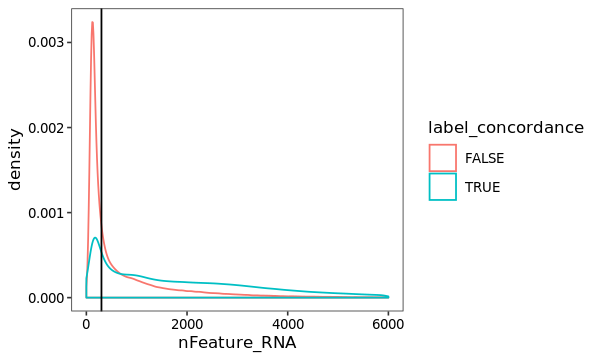

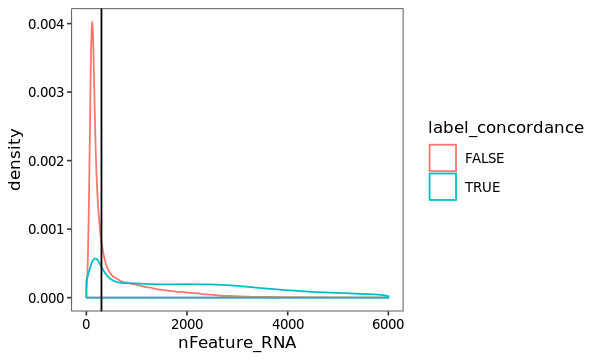

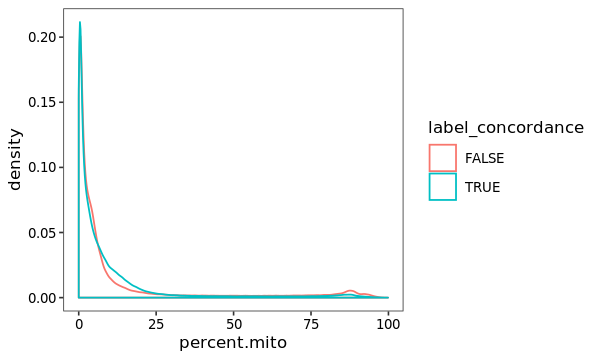

In [35]:
options(repr.plot.width = 5, repr.plot.height =3)
ggplot(all_stats_annot,aes(x=nFeature_RNA,col=label_concordance))+geom_density()+xlim(c(0,6000))+geom_vline(xintercept = 300)
ggplot(all_stats_annot[labels_cl_unif=="Epithelial",],aes(x=nFeature_RNA,col=label_concordance))+geom_density()+xlim(c(0,6000))+geom_vline(xintercept = 300)
ggplot(all_stats_annot,aes(x=percent.mito,col=label_concordance))+geom_density()

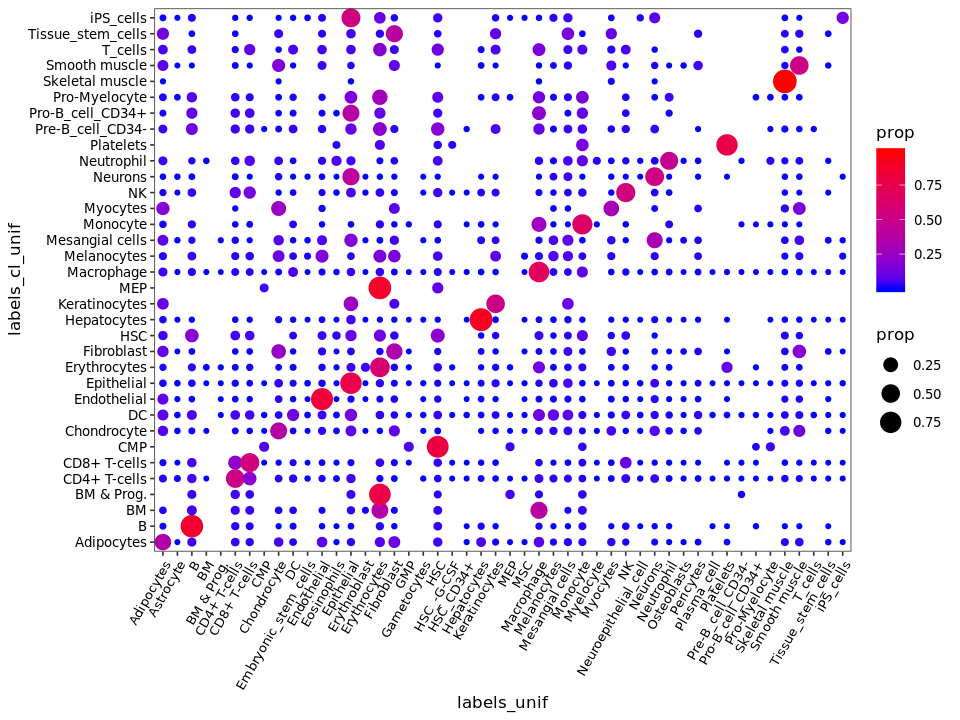

In [36]:
options(repr.plot.width = 8, repr.plot.height =6)
ggplot(all_stats_annot,aes(x=labels_unif,y=labels_cl_unif))+
geom_count(aes(size = stat(prop),col = stat(prop), group = labels_cl_unif))+
scale_color_gradient(high="red",low="blue")+rotate_labels()

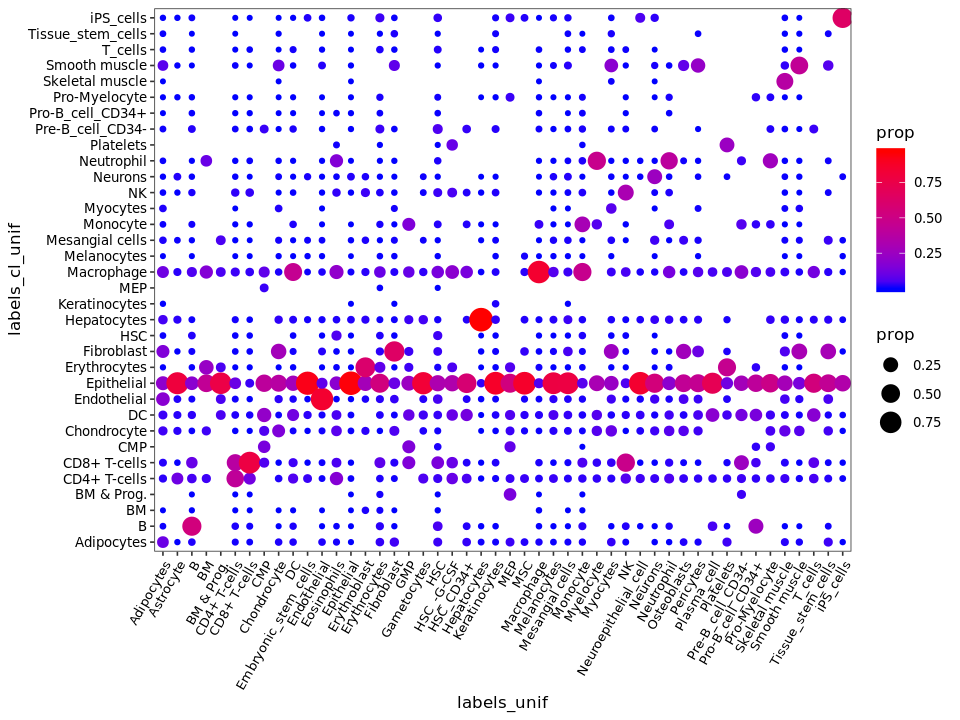

In [37]:
options(repr.plot.width = 8, repr.plot.height =6)
ggplot(all_stats_annot,aes(x=labels_unif,y=labels_cl_unif))+
geom_count(aes(size = stat(prop),col = stat(prop), group = labels_unif))+
scale_color_gradient(high="red",low="blue")+rotate_labels()

In [44]:
cross_labels=as.data.frame(dcast(all_stats[,.N,by=c("labels_unif","labels_cl_unif")],labels_unif~labels_cl_unif,fill=0))
row.names(cross_labels)=cross_labels$labels_unif
cross_labels$labels_unif=NULL

Using 'N' as value column. Use 'value.var' to override


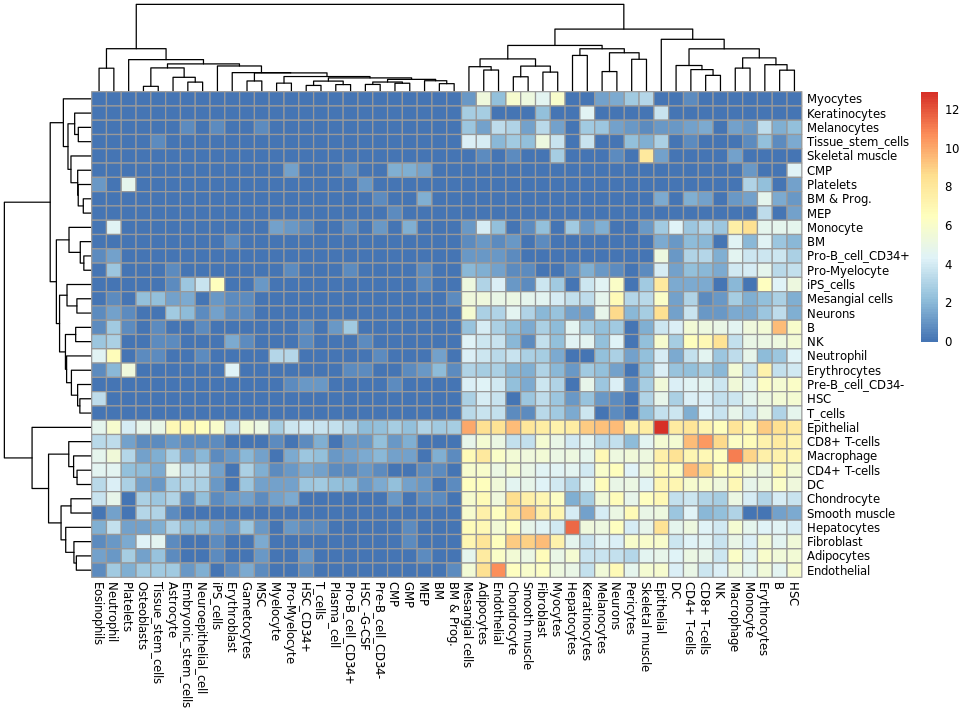

In [47]:
library(pheatmap)
pheatmap(t(log(cross_labels+1)),fontsize = 7)

### cluster wise annotation

In [22]:
all_stats_annot[,labels_cl_unif:=factor(labels_cl_unif,levels=unique(names(cl_unif_sort))),]

In [ ]:
options(repr.plot.width = 15, repr.plot.height =12)
ggplot(all_stats_annot[condition%in%c("TST","fresh")],aes(y=as.numeric(percent.mito),x=paste0(condition,"_",mode),color=paste0(condition,"_",mode)))+
geom_boxplot()+geom_violin(fill="transparent")+
geom_hline(yintercept = c(50))+
facet_wrap(~labels_cl_unif,scale="free")+rotate_labels()

In [ ]:
options(repr.plot.width = 15, repr.plot.height =12)
ggplot(all_stats_annot[condition%in%c("TST","fresh")&nCount_RNA<10000],aes(y=as.numeric(nCount_RNA),x=paste0(condition,"_",mode),color=paste0(condition,"_",mode)))+
geom_boxplot()+geom_violin(fill="transparent")+
geom_hline(yintercept = c(1000,2000))+
facet_wrap(~labels_cl_unif,scale="free")+rotate_labels()

In [ ]:
options(repr.plot.width = 15, repr.plot.height =12)
ggplot(all_stats_annot[condition%in%c("TST","fresh")&nCount_RNA<10000],aes(y=as.numeric(nFeature_RNA),x=paste0(condition,"_",mode),color=paste0(condition,"_",mode)))+
geom_boxplot()+geom_violin(fill="transparent")+
geom_hline(yintercept = c(1500,700))+
facet_wrap(~labels_cl_unif,scale="free")+rotate_labels()

### cell wise annothation

In [26]:
all_stats_annot[,labels_unif:=factor(labels_unif,levels=unique(names(unif_sort))),]

In [ ]:
options(repr.plot.width = 15, repr.plot.height =12)
ggplot(all_stats_annot[condition%in%c("TST","fresh")],aes(y=as.numeric(percent.mito),x=paste0(condition,"_",mode),color=paste0(condition,"_",mode)))+
geom_boxplot()+geom_violin(fill="transparent")+
facet_wrap(~labels_unif,scale="free")+rotate_labels()

In [ ]:
options(repr.plot.width = 15, repr.plot.height =12)
ggplot(all_stats_annot[condition%in%c("TST","fresh")&nCount_RNA<10000],aes(y=as.numeric(nCount_RNA),x=paste0(condition,"_",mode),color=paste0(condition,"_",mode)))+
geom_boxplot()+geom_violin(fill="transparent")+
geom_hline(yintercept = c(2000,1000))+
facet_wrap(~labels_unif,scale="free")+rotate_labels()

In [ ]:
options(repr.plot.width = 15, repr.plot.height =12)
ggplot(all_stats_annot[condition%in%c("TST","fresh")&nCount_RNA<10000],aes(y=as.numeric(nFeature_RNA),x=paste0(condition,"_",mode),color=paste0(condition,"_",mode)))+
geom_boxplot()+geom_violin(fill="transparent")+
geom_hline(yintercept = c(1500,700))+
facet_wrap(~labels_unif,scale="free")+rotate_labels()

In [ ]:
options(repr.plot.width = 16, repr.plot.height =6)
ggplot(all_stats_annot[labels_cl_unif=="Epithelial"&condition%in%c("fresh","TST")],aes(x=as.numeric(labels_score),y=as.numeric(nFeature_RNA),color=label_concordance))+
geom_point(alpha=0.3,size=0.1)+facet_wrap(~paste0(condition,"_",mode))

In [ ]:
options(repr.plot.width = 16, repr.plot.height =6)
ggplot(all_stats_annot[labels_cl_unif=="CD8+ T-cells"&condition%in%c("fresh","TST")],aes(x=as.numeric(labels_score),y=as.numeric(nFeature_RNA),col=label_concordance))+
geom_point(alpha=0.3,size=0.1)+facet_wrap(~paste0(condition,"_",mode))

In [ ]:
options(repr.plot.width = 16, repr.plot.height =6)
ggplot(all_stats_annot[labels_cl_unif=="Epithelial"&condition%in%c("fresh","TST")],aes(x=as.numeric(nFeature_RNA),y=as.numeric(nCount_RNA)))+
geom_point(alpha=0.1,size=0.1)+facet_wrap(~paste0(condition,"_",mode),scale="free")+ylim(c(0,100000))+xlim(c(0,10000))

In [ ]:
options(repr.plot.width = 15, repr.plot.height =12)
ggplot(all_stats_annot[condition%in%c("TST","fresh")&nCount_RNA<10000],aes(x=as.numeric(nFeature_RNA),color=paste0(condition,"_",mode)))+
geom_density()+
geom_vline(xintercept = c(300))+
facet_wrap(~labels_cl_unif,scale="free")

In [196]:
## calulate mean features per channel
all_stats_annot[,mean_feature_per_channel:=mean(nFeature_RNA),by="orig.ident"]

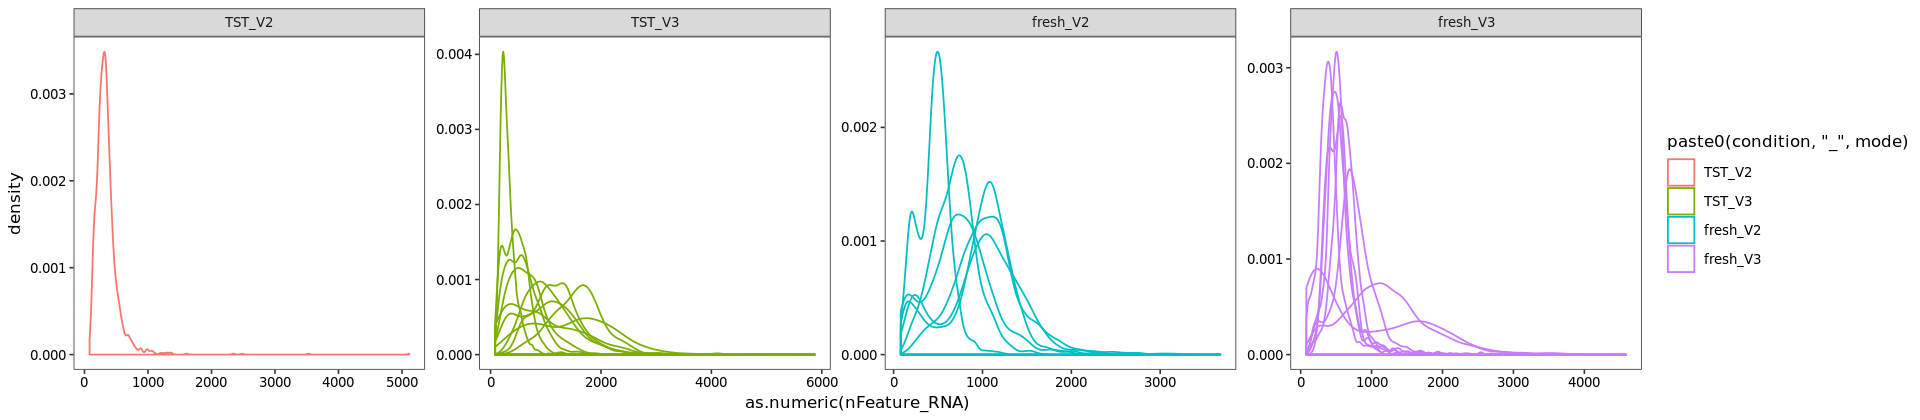

In [197]:
options(repr.plot.width = 16, repr.plot.height =3.5)
ggplot(all_stats_annot[condition%in%c("TST","fresh")&nCount_RNA<10000&labels_cl_unif=="CD8+ T-cells"&mean_feature_per_channel>1000],aes(x=as.numeric(nFeature_RNA),color=paste0(condition,"_",mode),group=name))+
geom_density()+facet_wrap(~paste0(condition,"_",mode),scale="free",ncol=4)

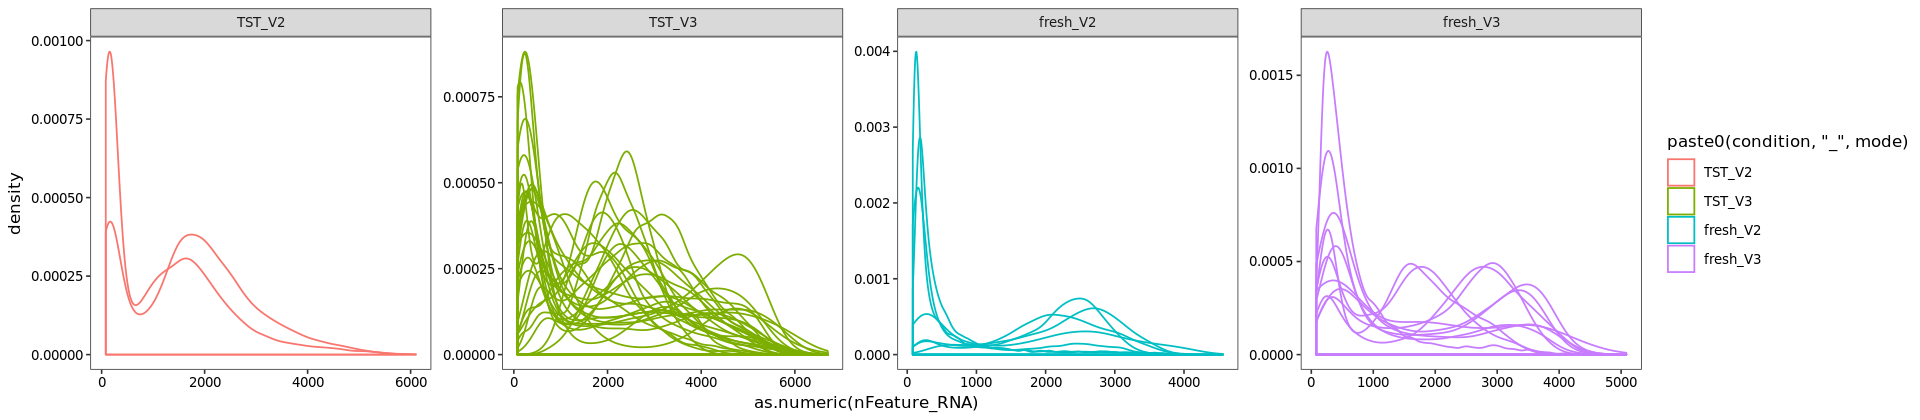

In [198]:
options(repr.plot.width = 16, repr.plot.height =3.5)
ggplot(all_stats_annot[condition%in%c("TST","fresh")&nCount_RNA<10000&labels_cl_unif=="Epithelial"&mean_feature_per_channel>1000],aes(x=as.numeric(nFeature_RNA),color=paste0(condition,"_",mode),group=name))+
geom_density()+facet_wrap(~paste0(condition,"_",mode),scale="free",ncol=4)

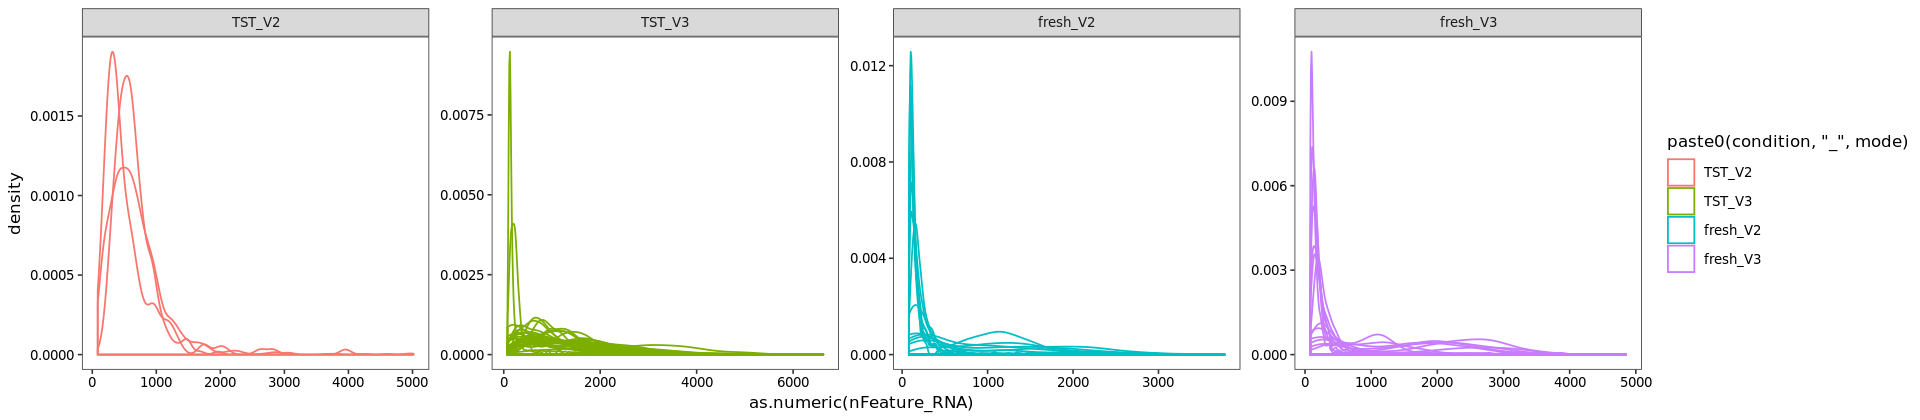

In [199]:
options(repr.plot.width = 16, repr.plot.height =3.5)
ggplot(all_stats_annot[condition%in%c("TST","fresh")&nCount_RNA<10000&labels_cl_unif=="Macrophage"],aes(x=as.numeric(nFeature_RNA),color=paste0(condition,"_",mode),group=name))+
geom_density()+facet_wrap(~paste0(condition,"_",mode),scale="free",ncol=4)

## Create lists of plots

In [ ]:
#fresh
pl_fresh=list()
pl_fresh_f=list()
pl_fresh_m=list()
pl_fresh_c=list()
pl_fresh_r=list()
for (sample in unique(sample_sheet[condition%in%c("fresh")]$sampleid)){
    print(sample)
    simpleCache(sample,cacheDir = cacheDir,cacheSubDir = "raw",assignToVariable = "so")
   pl_fresh[[sample]]=UMAPPlot(so,group.by="labels_cl_unif")
   pl_fresh_f[[sample]]=FeaturePlot(so,features="nFeature_RNA",max.cutoff = quantile(so@meta.data$nFeature_RNA,0.95),pt.size = 0.1 )
    pl_fresh_m[[sample]]=FeaturePlot(so,features="percent.mito",max.cutoff = quantile(so@meta.data$nFeature_RNA,0.98),pt.size = 0.1 )
   pl_fresh_c[[sample]]=UMAPPlot(so,group.by="condition")
    pl_fresh_r[[sample]]=UMAPPlot(so,group.by="replicate")
}

In [ ]:
options(repr.plot.width = 40, repr.plot.height =20)
cowplot::plot_grid(plotlist = pl_fresh_c,labels = names(pl_fresh_c))

In [ ]:
options(repr.plot.width = 40, repr.plot.height =20)
cowplot::plot_grid(plotlist = pl_fresh,labels = names(pl_fresh))

In [ ]:
options(repr.plot.width = 40, repr.plot.height =20)
cowplot::plot_grid(plotlist = pl_fresh_f,labels = names(pl_fresh_f),label_y=0.92)

In [ ]:
options(repr.plot.width = 40, repr.plot.height =20)
cowplot::plot_grid(plotlist = pl_fresh_m,labels = names(pl_fresh_m),label_y=0.92)

In [ ]:
#frozen
pl_tst=list()
pl_tst_f=list()
pl_tst_c=list()
pl_tst_m=list()
pl_tst_r=list()
for (sample in c(unique(sample_sheet[condition%in%c("TST")]$sampleid),unique(sample_sheet[condition%in%c("TST")]$channel_id))){
    if (file.exists(paste0(cacheDir,"/raw/",sample,".RData"))){
    print(sample)
    simpleCache(sample,cacheDir = cacheDir,cacheSubDir = "raw",assignToVariable = "so")
    pl_tst[[sample]]=UMAPPlot(so,group.by="labels_cl_unif")
    pl_tst_f[[sample]]=FeaturePlot(so,features="nFeature_RNA",max.cutoff = quantile(so@meta.data$nFeature_RNA,0.95),pt.size = 0.1 )
    pl_tst_m[[sample]]=FeaturePlot(so,features="percent.mito",max.cutoff = quantile(so@meta.data$nFeature_RNA,0.98),pt.size = 0.1 )
    pl_tst_c[[sample]]=UMAPPlot(so,group.by="condition")
    pl_tst_r[[sample]]=UMAPPlot(so,group.by="replicate")
    }
}

In [ ]:
options(repr.plot.width = 45, repr.plot.height =35)
cowplot::plot_grid(plotlist = pl_tst,labels = names(pl_tst))

In [ ]:
options(repr.plot.width = 45, repr.plot.height =35)
cowplot::plot_grid(plotlist = pl_tst_c,labels = names(pl_tst_c))

In [ ]:
options(repr.plot.width = 45, repr.plot.height =35)
cowplot::plot_grid(plotlist = pl_tst_f,labels = names(pl_tst_f),label_y=0.92)

In [ ]:
options(repr.plot.width = 45, repr.plot.height =35)
cowplot::plot_grid(plotlist = pl_tst_m,labels = names(pl_tst_m),label_y=0.92)

## Filter and check

In [13]:
#by cell type and data type
# %mito <50%
# nGenes: median > 1000: >500; median > 500: 300; median <500: >100 & <6000
# nUmi: median > 2000: >1000, median > 1000: >500; median < 1000: >300 & <10000

minGene=list(c(1300,700),c(600,300),c(0,100))
maxGene=8000
minUMI=list(c(1800,1100),c(900,600),c(0,300))
maxUMI=20000
maxMito=50

In [14]:
all_stats_annot[,filt_median_genes:=median(as.numeric(nFeature_RNA)),by=c("condition","mode","labels_cl_unif")]
all_stats_annot[,filt_median_umi:=median(as.numeric(nCount_RNA)),by=c("condition","mode","labels_cl_unif")]

In [15]:
all_stats_annot[,pass:=ifelse(percent.mito<maxMito&nCount_RNA<maxUMI&nFeature_RNA<maxGene&
    ((filt_median_genes>minGene[[1]][1]&nFeature_RNA>minGene[[1]][2])|
     (filt_median_genes>minGene[[2]][1]&filt_median_genes<minGene[[1]][1]&nFeature_RNA>minGene[[2]][2])|
     (filt_median_genes>minGene[[3]][1]&filt_median_genes<minGene[[2]][1]&nFeature_RNA>minGene[[3]][2])
    )&(
     (filt_median_umi>minUMI[[1]][1]&nCount_RNA>minUMI[[1]][2])|
     (filt_median_umi>minUMI[[2]][1]&filt_median_umi<minUMI[[1]][1]&nCount_RNA>minUMI[[2]][2])|
     (filt_median_umi>minUMI[[3]][1]&filt_median_umi<minUMI[[2]][1]&nCount_RNA>minUMI[[3]][2])
    ),
    TRUE,FALSE),]

In [15]:
#only write the first time to match objects
#dir.create(statsSummaryDir)
#write.table(all_stats_annot,paste0(statsSummaryDir,"/all_stats_filt.tsv"),sep="\t",quote=FALSE,row.names=FALSE)

In [16]:
table(all_stats_annot$pass)


 FALSE   TRUE 
397165 636533 

In [17]:
sort(table(all_stats_annot[pass==TRUE]$labels_cl_unif),decreasing=TRUE)


       Epithelial       Hepatocytes        Macrophage      CD8+ T-cells 
           311982             71625             50085             45759 
      Endothelial        Fibroblast      CD4+ T-cells     Smooth muscle 
            37253             25997             20127             15799 
                B           Neurons       Chondrocyte                NK 
            11104             10546              8210              5610 
         Monocyte        Adipocytes         iPS_cells   Skeletal muscle 
             4913              3481              3398              1875 
  Mesangial cells                DC      Erythrocytes          Myocytes 
             1747              1360              1255              1153 
       Neutrophil               HSC  Pro-B_cell_CD34+  Pre-B_cell_CD34- 
              994               921               318               203 
Tissue_stem_cells     Keratinocytes           T_cells        BM & Prog. 
              166               151               

In [18]:
sort(table(all_stats_annot[pass==FALSE]$labels_cl_unif)/table(all_stats_annot$labels_cl_unif),decreasing=TRUE)


 Pre-B_cell_CD34-     Pro-Myelocyte           T_cells                DC 
        0.9234828         0.8937198         0.8454333         0.8426290 
        Platelets                BM       Melanocytes Tissue_stem_cells 
        0.8066667         0.7442922         0.6476684         0.6327434 
       Adipocytes      Erythrocytes        Macrophage        Epithelial 
        0.5088883         0.4731318         0.4204399         0.4159172 
        iPS_cells       Chondrocyte        BM & Prog.        Neutrophil 
        0.3863103         0.3851569         0.3759398         0.3748428 
 Pro-B_cell_CD34+               MEP               HSC        Fibroblast 
        0.3715415         0.3714286         0.3630705         0.3601683 
      Hepatocytes   Mesangial cells       Endothelial   Skeletal muscle 
        0.3508759         0.3362462         0.3240124         0.3116740 
         Monocyte                 B      CD4+ T-cells               CMP 
        0.2996436         0.2981924         0.2906

In [19]:
all_stats_annot[pass==TRUE,.N,by=c("name")][order(N)]

name,N
<chr>,<int>
HTAPP-214-SMP-6753,64
HTAPP-749-SMP-3991,202
HTAPP-851-SMP-4351,461
HTAPP-806-SMP-6800,520
HTAPP-330-SMP-1082,597
HTAPP-983-SMP-7659,826
HTAPP-382-SMP-1441,1003
HTAPP-414-SMP-1681,1510
HTAPP-562-SMP-2581,1628


In [ ]:
options(repr.plot.width = 15, repr.plot.height =15)
ggplot(all_stats_annot[condition%in%c("TST","fresh")],aes(y=as.numeric(nCount_RNA),x=paste0(condition,"_",mode),color=paste0(condition,"_",mode)))+
geom_boxplot()+geom_violin(fill="transparent")+
geom_hline(yintercept = minUMI[[1]],lty=1)+
geom_hline(yintercept = minUMI[[2]],lty=2)+
geom_hline(yintercept = minUMI[[3]],lty=3)+
facet_wrap(~labels_cl_unif,scale="free",ncol=7)+rotate_labels()+coord_cartesian(ylim = c(0, 10000)) 

In [ ]:
options(repr.plot.width = 15, repr.plot.height =15)
ggplot(all_stats_annot[condition%in%c("TST","fresh")],aes(y=as.numeric(nFeature_RNA),x=paste0(condition,"_",mode),color=paste0(condition,"_",mode)))+
geom_boxplot()+geom_violin(fill="transparent")+
geom_hline(yintercept = minGene[[1]],lty=1)+
geom_hline(yintercept = minGene[[2]],lty=2)+
geom_hline(yintercept = minGene[[3]],lty=3)+
facet_wrap(~labels_cl_unif,scale="free",ncol=7)+rotate_labels()+coord_cartesian(ylim = c(0, 4000)) 

### Now actually filter and write filtered object

In [22]:
head(all_stats_annot)

name,condition,replicate,cellid,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,RNA_snn_res.0.8,seurat_clusters,labels,labels_score,labels_unif,labels_cl,labels_cl_unif,ccpm,Quality,Order,run status,Note,date,run_pipeline,Channel Name,Lane,Index,cancer,site,reference,chemistry,flowcell,seq_dir,mode,min_umis,min_genes,percent_mito,expected_cells,total_droplets,z_dim,z_layers,channel_id,label_concordance,labels_cl_unif_per_channel,filt_median_genes,filt_median_umi,pass
<chr>,<chr>,<chr>,<chr>,<chr>,<int64>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<lgl>
HTAPP-211-SMP-6751,TST,channel1,HTAPP-211-SMP-6751-TST-channel1_CAGGCCAAGTGGTTAA-1,HTAPP-211-SMP-6751-TST-channel1,26211,9130,9.507459,23,23,Epithelial cells,0.4647507,Epithelial,Epithelial cells,Epithelial,0300628_T1_TST,,47,done1,,2019_04_02,FALSE,0300628_T1_TST,1,SI-GA-A1,breast,liver,GRCh38_premrna_v3.0.0,SC3Pv3,HY3H7CCXY,/transfer/190330_SL-HXZ_0566_BFCHY3H7CCXY,V3,0,0,60,4000,30000,200,1000,HTAPP-211-SMP-6751_TST_channel1,TRUE,2282,1548,2076,FALSE
HTAPP-211-SMP-6751,TST,channel1,HTAPP-211-SMP-6751-TST-channel1_TTGCTGCAGACTTCCA-1,HTAPP-211-SMP-6751-TST-channel1,24855,9180,2.687588,23,23,Epithelial cells,0.4394724,Epithelial,Epithelial cells,Epithelial,0300628_T1_TST,,47,done1,,2019_04_02,FALSE,0300628_T1_TST,1,SI-GA-A1,breast,liver,GRCh38_premrna_v3.0.0,SC3Pv3,HY3H7CCXY,/transfer/190330_SL-HXZ_0566_BFCHY3H7CCXY,V3,0,0,60,4000,30000,200,1000,HTAPP-211-SMP-6751_TST_channel1,TRUE,2282,1548,2076,FALSE
HTAPP-211-SMP-6751,TST,channel1,HTAPP-211-SMP-6751-TST-channel1_CCCATTGTCTGTGCAA-1,HTAPP-211-SMP-6751-TST-channel1,24581,10099,4.239046,23,23,Hepatocytes,0.4999810,Hepatocytes,Epithelial cells,Epithelial,0300628_T1_TST,,47,done1,,2019_04_02,FALSE,0300628_T1_TST,1,SI-GA-A1,breast,liver,GRCh38_premrna_v3.0.0,SC3Pv3,HY3H7CCXY,/transfer/190330_SL-HXZ_0566_BFCHY3H7CCXY,V3,0,0,60,4000,30000,200,1000,HTAPP-211-SMP-6751_TST_channel1,FALSE,2282,1548,2076,FALSE
HTAPP-211-SMP-6751,TST,channel1,HTAPP-211-SMP-6751-TST-channel1_GATCGTATCCCAGGAC-1,HTAPP-211-SMP-6751-TST-channel1,21205,8796,4.456496,23,23,Epithelial cells,0.4141249,Epithelial,Epithelial cells,Epithelial,0300628_T1_TST,,47,done1,,2019_04_02,FALSE,0300628_T1_TST,1,SI-GA-A1,breast,liver,GRCh38_premrna_v3.0.0,SC3Pv3,HY3H7CCXY,/transfer/190330_SL-HXZ_0566_BFCHY3H7CCXY,V3,0,0,60,4000,30000,200,1000,HTAPP-211-SMP-6751_TST_channel1,TRUE,2282,1548,2076,FALSE
HTAPP-211-SMP-6751,TST,channel1,HTAPP-211-SMP-6751-TST-channel1_CCAATGACAGTTCACA-1,HTAPP-211-SMP-6751-TST-channel1,19870,7710,17.075994,23,23,Epithelial cells,0.4295492,Epithelial,Epithelial cells,Epithelial,0300628_T1_TST,,47,done1,,2019_04_02,FALSE,0300628_T1_TST,1,SI-GA-A1,breast,liver,GRCh38_premrna_v3.0.0,SC3Pv3,HY3H7CCXY,/transfer/190330_SL-HXZ_0566_BFCHY3H7CCXY,V3,0,0,60,4000,30000,200,1000,HTAPP-211-SMP-6751_TST_channel1,TRUE,2282,1548,2076,TRUE
HTAPP-211-SMP-6751,TST,channel1,HTAPP-211-SMP-6751-TST-channel1_TGGTGATAGCCTCTCT-1,HTAPP-211-SMP-6751-TST-channel1,19782,8582,5.039935,23,23,Epithelial cells,0.4603706,Epithelial,Epithelial cells,Epithelial,0300628_T1_TST,,47,done1,,2019_04_02,FALSE,0300628_T1_TST,1,SI-GA-A1,breast,liver,GRCh38_premrna_v3.0.0,SC3Pv3,HY3H7CCXY,/transfer/190330_SL-HXZ_0566_BFCHY3H7CCXY,V3,0,0,60,4000,30000,200,1000,HTAPP-211-SMP-6751_TST_channel1,TRUE,2282,1548,2076,FALSE


In [ ]:
for (sample in grep("HTAPP-214-SMP-6753",c(unique(sample_sheet$sampleid),unique(sample_sheet$channel_id)),invert = TRUE,value = TRUE)){
    if (file.exists(paste0(cacheDir,"/raw/",sample,".RData"))){
        print(sample)
        simpleCache(sample,cacheDir = cacheDir,cacheSubDir = "raw",assignToVariable = "so")
        simpleCache(sample,cacheDir = cacheDir,instruction = suppressMessages(subset_seurat(so,sel_cells = all_stats_annot[(name==sample|channel_id==sample)&pass==TRUE]$cellid)),
                    cacheSubDir = "filtered",recreate=FALSE,noload = TRUE)
        }
}

In [ ]:
#frozen
pl_tst=list()
pl_tst_f=list()
pl_tst_c=list()
pl_tst_m=list()
pl_tst_r=list()

for (sample in c(unique(sample_sheet[condition%in%c("TST")]$sampleid),unique(sample_sheet[condition%in%c("TST")]$channel_id))){
    if (file.exists(paste0(cacheDir,"/filtered/",sample,".RData"))){
    print(sample)
    simpleCache(sample,cacheDir = cacheDir,cacheSubDir = "filtered",assignToVariable = "so")
    pl_tst[[sample]]=UMAPPlot(so,group.by="labels_cl_unif")
    pl_tst_f[[sample]]=FeaturePlot(so,features="nFeature_RNA",max.cutoff = quantile(so@meta.data$nFeature_RNA,0.95),pt.size = 0.1 )
    pl_tst_m[[sample]]=FeaturePlot(so,features="percent.mito",max.cutoff = quantile(so@meta.data$nFeature_RNA,0.98),pt.size = 0.1 )
    pl_tst_c[[sample]]=UMAPPlot(so,group.by="condition")
    pl_tst_r[[sample]]=UMAPPlot(so,group.by="replicate")   
    }
}

In [ ]:
options(repr.plot.width = 45, repr.plot.height =35)
cowplot::plot_grid(plotlist = pl_tst_r,labels = names(pl_tst_r))

In [ ]:
options(repr.plot.width = 45, repr.plot.height =35)
cowplot::plot_grid(plotlist = pl_tst,labels = names(pl_tst))

In [ ]:
#fresh
pl_fresh_filt=list()
pl_fresh_filt_f=list()
pl_fresh_filt_c=list()
pl_fresh_filt_m=list()
pl_fresh_filt_r=list()
for (sample in c(unique(sample_sheet[condition%in%c("fresh")]$sampleid),unique(sample_sheet[condition%in%c("fresh")]$channel_id))){
    if (file.exists(paste0(cacheDir,"/filtered/",sample,".RData"))){
    print(sample)
    simpleCache(sample,cacheDir = cacheDir,cacheSubDir = "filtered",assignToVariable = "so")
    pl_fresh_filt[[sample]]=UMAPPlot(so,group.by="labels_cl_unif")
    pl_fresh_filt_f[[sample]]=FeaturePlot(so,features="nFeature_RNA",max.cutoff = quantile(so@meta.data$nFeature_RNA,0.95),pt.size = 0.1 )
    pl_fresh_filt_m[[sample]]=FeaturePlot(so,features="percent.mito",max.cutoff = quantile(so@meta.data$nFeature_RNA,0.98),pt.size = 0.1 )
    pl_fresh_filt_c[[sample]]=UMAPPlot(so,group.by="condition")
    pl_fresh_filt_r[[sample]]=UMAPPlot(so,group.by="replicate")
    }
}

In [ ]:
options(repr.plot.width = 45, repr.plot.height =35)
cowplot::plot_grid(plotlist = pl_fresh_filt_r,labels = names(pl_fresh_filt_r))

In [ ]:
options(repr.plot.width = 45, repr.plot.height =35)
cowplot::plot_grid(plotlist = pl_fresh_filt,labels = names(pl_fresh_filt))

In [ ]:
#samples for spatial
spatial_samples=c("HTAPP-364","HTAPP-735","HTAPP-783","HTAPP-853","HTAPP-917","HTAPP-313","HTAPP-330","HTAPP-982",
                  "HTAPP-812","HTAPP-997","HTAPP-514","HTAPP-880","HTAPP-213","HTAPP-878","HTAPP-382","HTAPP-944","HTAPP-895")

pl_tst=list()
pl_tst_f=list()
pl_tst_c=list()
pl_tst_m=list()
for (sample in sort(unique(sample_sheet[grepl(paste(spatial_samples,collapse = "|"),sampleid),]$sampleid))){
    if (file.exists(paste0(cacheDir,"/filtered/",sample,".RData"))){
    print(sample)
    simpleCache(sample,cacheDir = cacheDir,cacheSubDir = "filtered",assignToVariable = "so")
    pl_tst[[sample]]=UMAPPlot(so,group.by="labels_cl_unif")
    pl_tst_f[[sample]]=FeaturePlot(so,features="nFeature_RNA",max.cutoff = quantile(so@meta.data$nFeature_RNA,0.95),pt.size = 0.1 )
    pl_tst_m[[sample]]=FeaturePlot(so,features="percent.mito",max.cutoff = quantile(so@meta.data$nFeature_RNA,0.98),pt.size = 0.1 )
    pl_tst_c[[sample]]=UMAPPlot(so,group.by="condition")
    }
}

In [ ]:
options(repr.plot.width = 30, repr.plot.height =14)
cowplot::plot_grid(plotlist = pl_tst,labels = names(pl_tst),ncol = 5)

### Combine samples that were too large pre-filtering

In [3]:
# combine filtered version of HTAPP-231-SMP-6758
simpleCache("HTAPP-231-SMP-6758_TST_channel1",cacheDir = cacheDir,cacheSubDir="filtered",assignToVariable = "ch1")
simpleCache("HTAPP-231-SMP-6758_TST_channel2",cacheDir = cacheDir,cacheSubDir="filtered",assignToVariable = "ch2")

::Loading cache::	/scratch/projects/HTAPP_MBC//phase2/RCache//filtered/HTAPP-231-SMP-6758_TST_channel1.RData
::Loading cache::	/scratch/projects/HTAPP_MBC//phase2/RCache//filtered/HTAPP-231-SMP-6758_TST_channel2.RData


In [5]:
merged=merge(ch1,ch2)
merged

An object of class Seurat 
25607 features across 23756 samples within 1 assay 
Active assay: RNA (25607 features)

In [7]:
suppressMessages(merged<-subset_seurat(merged,colnames(merged@assays$RNA@data)))

In [ ]:
options(repr.plot.width = 6, repr.plot.height =4)
UMAPPlot(merged,group.by="labels_cl_unif")

In [ ]:
simpleCache("HTAPP-231-SMP-6758",instruction = merged,cacheDir = cacheDir,cacheSubDir="filtered")

::Creating cache::	/scratch/projects/HTAPP_MBC//phase2/RCache//filtered/HTAPP-231-SMP-6758.RData


### Check some

In [3]:
simpleCache("HTAPP-735-SMP-3841",cacheDir = cacheDir,cacheSubDir="filtered",assignToVariable = "so")

::Loading cache::	/scratch/projects/HTAPP_MBC//phase2/RCache//filtered/HTAPP-735-SMP-3841.RData


In [ ]:
options(repr.plot.width = 6, repr.plot.height =4)
UMAPPlot(so,group.by="labels_cl_unif")
TSNEPlot(so,group.by="labels_cl_unif")

In [ ]:
options(repr.plot.width = 14, repr.plot.height =6)
FeaturePlot(so,features=c("CD19","IGHM","CD68","CD3D","CD3E","CD3G","KRT8"),ncol = 4,pt.size = 0.1)